## Compare fits spectra from Calspec on the same plot
============================================

- author : Sylvie Dagoret-Campagne
- creation date January 12th 2017

The purpose is to view the spectrum of the stars measured in CTIO.
The various spectra are compared on the same plot

- Location from where the fits file can be downloaded:

ftp://ftp.stsci.edu/cdbs/current_calspec/


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [50]:
from astropy.io import fits

In [51]:
import os

In [52]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#### Specify the path of input

In [53]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016'

#### Specify the list of input file you have

In [54]:
filelist=['hd38949_stis_003.fits','hd60753_stis_003.fits','hd185975_stis_003.fits','hd37962_stis_003.fits']

#### Build the list of fullfilename

In [55]:
fullfilename = [ os.path.join(path,file) for file in filelist]

In [56]:
NBSPECTRA=len(fullfilename )

In [57]:
fullfilename[:]

['/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd38949_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd60753_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd185975_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd37962_stis_003.fits']

Get the object name from the filename.
Regular expressions are used

#### Get the object name from the filename

In [58]:
object_names = [re.findall('^(hd[0-9][0-9][0-9][0-9][0-9])*',file)[0] for file in filelist]

In [59]:
object_names

['hd38949', 'hd60753', 'hd18597', 'hd37962']

#### Select One file

In [60]:
hdu_list_coll=[]
for index in range(NBSPECTRA):
    hdulist=fits.open(fullfilename[index])
    hdulist.info()
    hdu_list_coll.append(hdulist)

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd38949_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3740R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd60753_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3305R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd185975_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3740R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd37962_stis_003.fits
No.    Name         Type      C

#### Primary extension of fits file

In [61]:
#hdulist[0].header

In [62]:
#print hdulist[0].header.keys()

####  Secondary extension of fits file

In [63]:
#hdulist[1].header

## Extract Data

In [64]:
wavelengths_coll=[]
fluxes_coll=[]
for index in range(NBSPECTRA):
    hdulist=hdu_list_coll[index]
    table_data=hdulist[1].data
    # table_data.columns  # shows the columns names of the table
    wavelengths=table_data.field('WAVELENGTH')/10.
    fluxes=table_data.field('FLUX')
    wavelengths_coll.append(wavelengths)
    fluxes_coll.append(fluxes)    

### Select wavelength Ranges

In [65]:
WLMIN=300.
WLMAX=1500.

### Only get fluxes in the selected Wavelength range

In [66]:
selected_fluxes_coll=[]
for index in range(NBSPECTRA):
    selected_indexes=np.where(np.logical_and(wavelengths_coll[index]>WLMIN, wavelengths_coll[index]<WLMAX))
    selected_fluxes=fluxes_coll[index][selected_indexes]
    selected_fluxes_coll.append(selected_fluxes)
    

In [67]:
all_fluxes=np.concatenate(selected_fluxes_coll)

## Plot display  parameters

In [68]:
ymax=all_fluxes.max()*1.1  # Min and Max in vertical
ymin=all_fluxes.min()

In [69]:
wl_O2Aline=759.37      # Balmer Lines
wl_O2Bline=686.719
wl_Haline=656.281 
wl_Hbline=486.134
wl_Hgline=434.047 
wl_Hdline=410.175
wl_Heline=397.0


## Simple plot

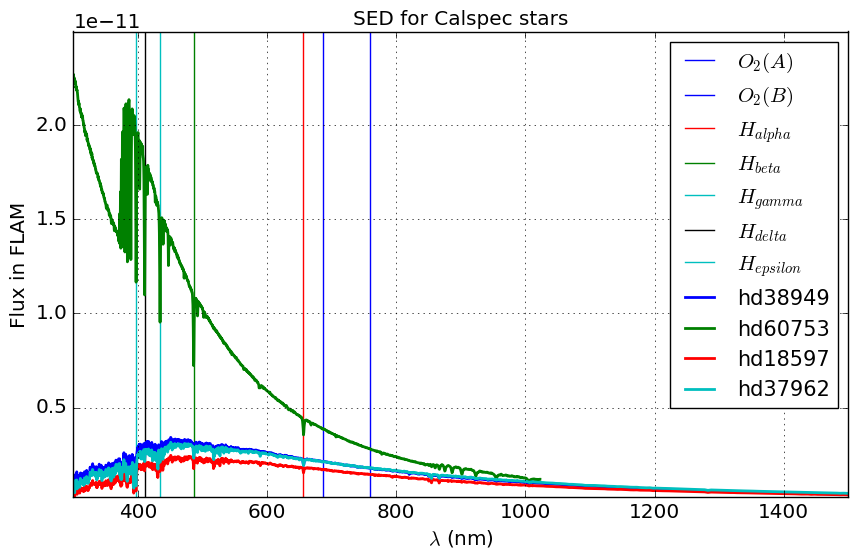

In [79]:
plt.figure(figsize=(10.,6.))

plt.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
plt.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
plt.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
plt.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
plt.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
plt.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
plt.plot([wl_Heline,wl_Heline],[ymin,ymax],'c-',label='$H_{epsilon}$',lw=1)

for index in range(NBSPECTRA):   
    plt.plot(wavelengths_coll[index],fluxes_coll[index],label=object_names[index],lw=2)
   
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Flux in FLAM')
plt.xlim(300,1500.)
plt.ylim(ymin,ymax)
plt.grid(True)
title='SED for {}'.format('Calspec stars')
plt.title(title)
plt.legend(loc='best',fontsize=15)
figfilename='calspecspectra.pdf'
plt.savefig(figfilename)

## Plot with more fine grid

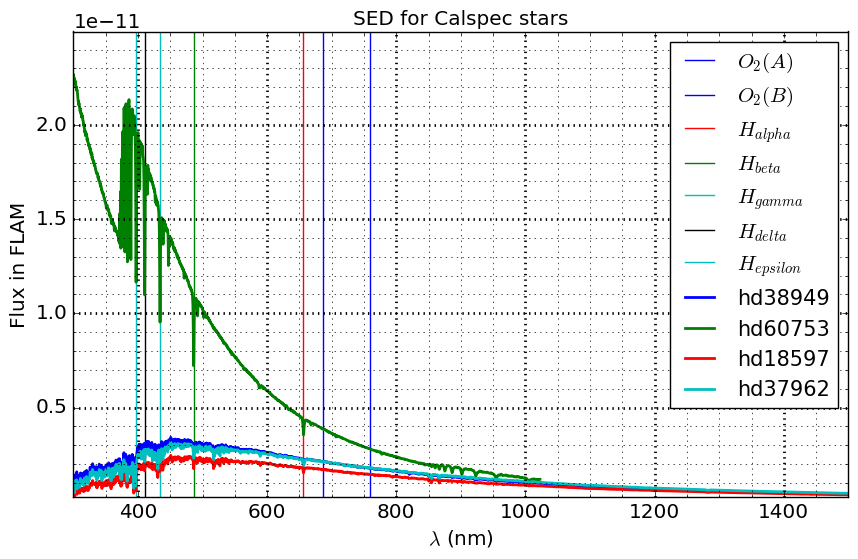

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

title='SED for {}'.format('Calspec stars')
figfilename='SED_{}_v2'.format('calspecspectra')+'.pdf'
ax.set_xlabel('$\lambda$ (nm)')
ax.set_ylabel('Flux in FLAM')
ax.set_title(title)
ax.set_xlim(300,1500.)
ax.set_ylim(ymin,ymax)
plt.grid(True)

ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
ax.plot([wl_Heline,wl_Heline],[ymin,ymax],'c-',label='$H_{epsilon}$',lw=1)

for index in range(NBSPECTRA):   
    ax.plot(wavelengths_coll[index],fluxes_coll[index],label=object_names[index],lw=2)
    

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.legend(loc='best',fontsize=15)
plt.savefig(figfilename)